In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [90]:
data = pd.read_csv('./train.csv')
storeData = pd.read_csv('./store.csv')
test = pd.read_csv('./test.csv')

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [3]:
storeData.head()


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270,9,2008,0,NaN,NaN,NaN
1,2,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,c,c,620,9,2009,0,NaN,NaN,NaN
4,5,a,a,29910,4,2015,0,NaN,NaN,NaN


In [4]:
data['DateTime'] = pd.to_datetime(data['Date'])

In [5]:
data['Year'] = data['DateTime'].apply(lambda x: x.year)
data['Month'] = data['DateTime'].apply(lambda x: x.month)
data['Day'] = data['DateTime'].apply(lambda x: x.day)
data['WeekNumber'] = data['DateTime'].apply(lambda x: x.isocalendar()[1])

In [6]:
data.dtypes

Store                     int64
DayOfWeek                 int64
Date                     object
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
DateTime         datetime64[ns]
Year                      int64
Month                     int64
Day                       int64
WeekNumber                int64
dtype: object

In [7]:
date_groups = data.groupby('Month')

In [8]:
date_groups['Sales'].mean()

Month
1     5465.395529
2     5645.253150
3     5784.578871
4     5738.866916
5     5489.639973
6     5760.964375
7     6064.915711
8     5693.016554
9     5570.246033
10    5537.037419
11    6008.111821
12    6826.611377
Name: Sales, dtype: float64

Populating the interactive namespace from numpy and matplotlib


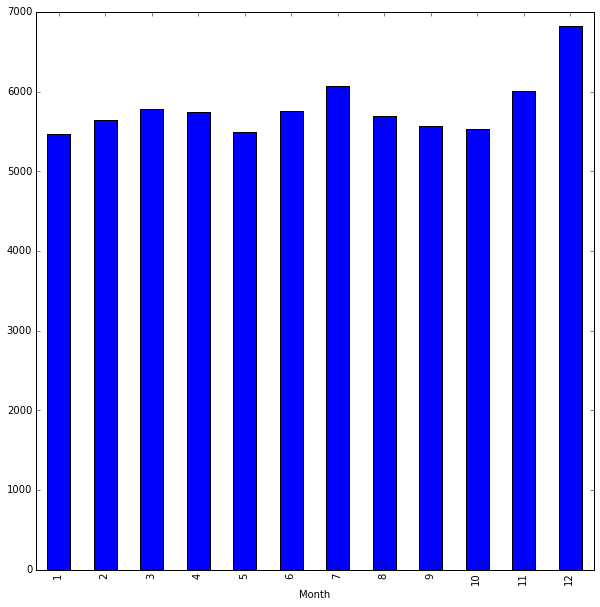

In [9]:
%pylab inline
date_groups['Sales'].mean().plot(figsize=(10,10), kind="bar")

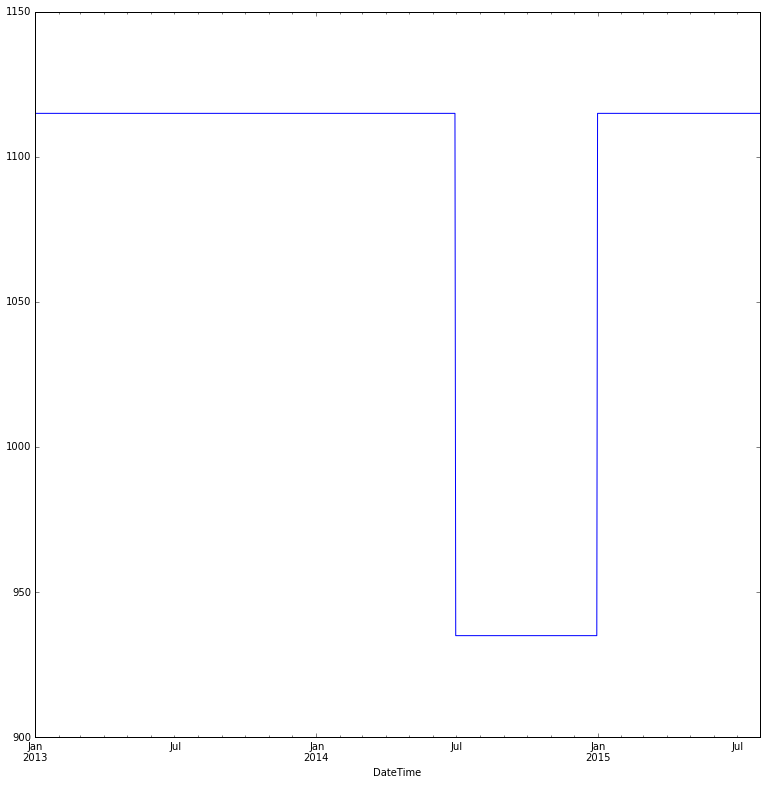

In [10]:
mask = (data['Open'] == 1)
grouped = data.groupby('DateTime')
grouped['Store'].count().plot(figsize=(13,13))

In [11]:
store_dict = {942: [],
              941: [],
              758: []}
for x, y in data.groupby('Store'):
    store_dict[y['Sales'].count()].append(x)
    

In [12]:
full_data_mask = data['Store'].apply(lambda x: x in store_dict[942])

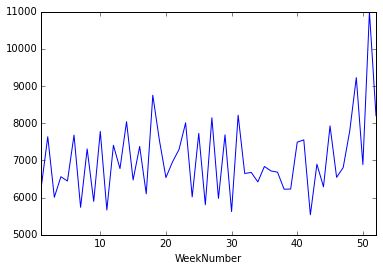

In [13]:
data[full_data_mask & (data['Open'] == 1)].groupby('WeekNumber')['Sales'].mean().plot()

In [14]:
data[full_data_mask].count()

Store            879828
DayOfWeek        879828
Date             879828
Sales            879828
Customers        879828
Open             879828
Promo            879828
StateHoliday     879828
SchoolHoliday    879828
DateTime         879828
Year             879828
Month            879828
Day              879828
WeekNumber       879828
dtype: int64

In [15]:
data[(data['Sales']==0) & (data['Open'] ==1)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,DateTime,Year,Month,Day,WeekNumber
86825,971,5,2015-05-15,0,0,1,0,0,1,2015-05-15,2015,5,15,20
142278,674,4,2015-03-26,0,0,1,0,0,0,2015-03-26,2015,3,26,13
196938,699,4,2015-02-05,0,0,1,1,0,0,2015-02-05,2015,2,5,6
322053,708,3,2014-10-01,0,0,1,1,0,0,2014-10-01,2014,10,1,40
330176,357,1,2014-09-22,0,0,1,0,0,0,2014-09-22,2014,9,22,39
340348,227,4,2014-09-11,0,0,1,0,0,0,2014-09-11,2014,9,11,37
340860,835,4,2014-09-11,0,0,1,0,0,0,2014-09-11,2014,9,11,37
341795,835,3,2014-09-10,0,0,1,0,0,0,2014-09-10,2014,9,10,37
346232,548,5,2014-09-05,0,0,1,1,0,1,2014-09-05,2014,9,5,36
346734,28,4,2014-09-04,0,0,1,1,0,0,2014-09-04,2014,9,4,36


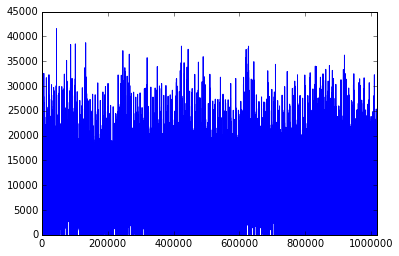

In [16]:
data['Sales'].plot()

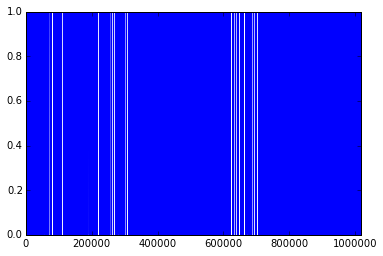

In [17]:
data['Open'].plot()

In [18]:
from sklearn.preprocessing import StandardScaler

In [25]:
####Warning - takes about 3 min to run the Fit function & I didnt use the State Holiday
#missing state holidays
from sklearn.svm import LinearSVR
clf = LinearSVR()
X = data[['Store', 'DayOfWeek', 'Customers', 'Open','Promo','SchoolHoliday','Year','Month','Day','WeekNumber']]
y = data['Sales']
#clf.fit(X, y)



LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [27]:
clf.score(X,y)
#R^2 of the prediction (sales) = 82%

0.82223633820324327